In [13]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

my_asset = yf.download('SPY', start = '2019-01-01')
my_asset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,249.559998,250.190002,247.470001,249.919998,237.611664,144299400
2019-01-02,245.979996,251.210007,245.949997,250.179993,237.858887,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,232.182892,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,239.960037,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,241.852036,103139100


ValueError: x and y must be the same size

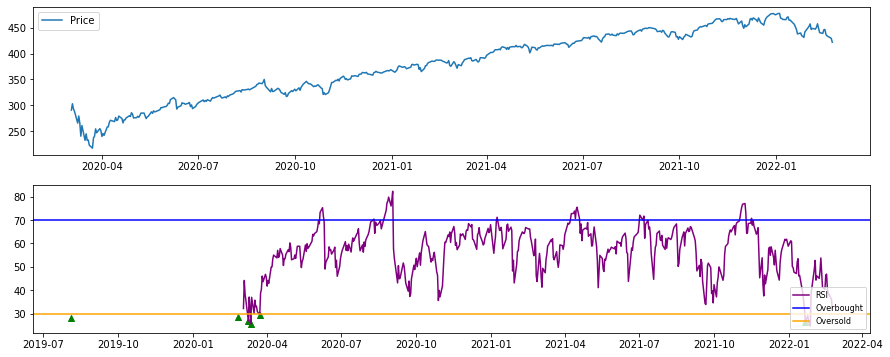

In [18]:
def RSI(data, window=14, adjust=False):
    delta = data['Adj Close'].diff(1).dropna()
    loss = delta.copy()
    gains = delta.copy()

    gains[gains<0] = 0
    loss[loss>0] = 0

    gain_ewm = gains.ewm(com=window-1, adjust=adjust).mean()
    loss_ewm = abs(loss.ewm(com=window-1, adjust=adjust).mean())

    RS = gain_ewm / loss_ewm
    RSI = 100 - 100/(1 + RS)
    
    return RSI

rsi = RSI(my_asset)

my_asset = my_asset[1:]
my_asset['RSI'] = rsi
my_asset['sell trigger'] = np.where((rsi > 70) & (rsi.shift(1) <= 70), 1, 0)
my_asset['buy trigger'] = np.where((rsi < 30) & (rsi.shift(1) >= 30), 1, 0)

fig, ax = plt.subplots(2, 1, figsize=(15, 6))
ax[0].plot(my_asset['Adj Close'][-500:], label='Price')
ax[1].plot(rsi[-500:], label='RSI', c='purple')
ax[1].axhline(y=70, c='blue', label='Overbought')
ax[1].axhline(y=30, c='orange', label='Oversold')
ax[0].legend()
ax[1].legend(loc='lower right', fontsize=8)

ax[1].scatter(my_asset[my_asset['buy trigger'] == 1].index, 
              my_asset[my_asset['buy trigger'] == 1]['RSI'],
             marker = '^', c = 'green')

ax[1].scatter(my_asset[my_asset['sell trigger'] == 1][-16:].index, 
              my_asset[my_asset['sell trigger'] == 1]['RSI'],
             marker = 'v', c = 'red')

In [ ]:
     # # set date as index
                        # asset_data = asset_data.set_index(asset_data['Date'])

                        # # delta
                        # delta = asset_data['Adj Close'].diff(1).dropna()

                        # # gains and loss variables
                        # up = delta.copy()
                        # down = delta.copy()

                        # # conditions for delta (up or down)
                        # up[up < 0] = 0
                        # down[down > 0] = 0

                        # # ewm gains
                        # up_ewm = up.ewm(com = window - 1, adjust = False).mean()

                        # # ewm losses
                        # down_ewm = down.ewm(com = window - 1, adjust = False).mean()

                        # # return (up_ewm, down_ewm)
                        # relative_strength = up_ewm / down_ewm
                        # calculate_RSI = 100 - (100 / (1 + relative_strength))

                        # return calculate_RSI(asset, window=14)

In [ ]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()
